In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Electricity_data = pd.read_csv(r"D:\Documents\Analaytix labs\Study case ML\13. Capstone Case Study - Demand Estimation\Electricity Consumption.csv")

In [3]:
Electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [4]:
Electricity_data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [6]:
Electricity_data['DATE'] = pd.to_datetime(Electricity_data['DATE'], format='%d/%m/%Y')

In [7]:
Electricity_data = Electricity_data.set_index(Electricity_data.DATE)
# As we are solving Time Series data , but for that we need to set Date as a Index .

In [8]:
Electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-01-09
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [9]:
Electricity_data

,DATE,Electricty_Consumption_in_TW
DATE,,
1973-01-01,1973-01-01,35.9728
1973-01-02,1973-01-02,36.1334
1973-01-03,1973-01-03,35.0625
1973-01-04,1973-01-04,33.8416
1973-01-05,1973-01-05,33.5107
...,...,...
2019-01-05,2019-01-05,97.5860
2019-01-06,2019-01-06,110.8580
2019-01-07,2019-01-07,122.1014


In [10]:
import calendar

In [11]:
Electricity_data['Month']=Electricity_data.DATE.dt.month
Electricity_data['Year']=Electricity_data.DATE.dt.year
Electricity_data['Day']=Electricity_data.DATE.dt.day

# For better understanding we create new column having month , year , Day  & extracting value from Date .

In [12]:
Electricity_data.head()

,DATE,Electricty_Consumption_in_TW,Month,Year,Day
DATE,,,,,
1973-01-01,1973-01-01,35.9728,1,1973,1
1973-01-02,1973-01-02,36.1334,1,1973,2
1973-01-03,1973-01-03,35.0625,1,1973,3
1973-01-04,1973-01-04,33.8416,1,1973,4
1973-01-05,1973-01-05,33.5107,1,1973,5


In [13]:
pd.pivot_table(data = Electricity_data ,values=  'Electricty_Consumption_in_TW',index = 'Year', columns = 'Month')
# Here we are trying to see is there any missing value present or not .

Month,1
Year,
1973,37.024525
1974,40.501192
1975,40.803575
1976,42.811867
1977,45.649208
1978,48.819858
1979,50.328200
1980,51.335092
1981,52.163267


<AxesSubplot:xlabel='DATE'>

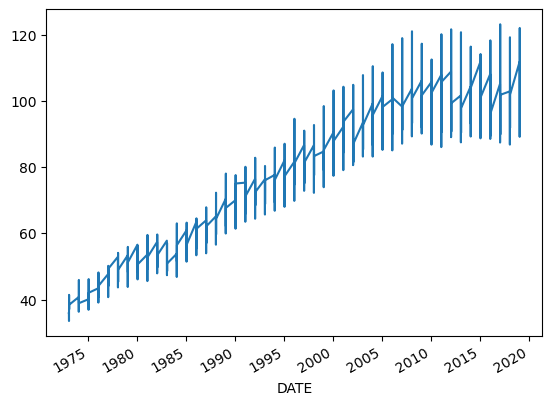

In [14]:
Electricity_data.Electricty_Consumption_in_TW.plot()
# Here we are trying to see how the value of Electricty_Consumption_in_TW is changing with time & we see that trend is increasing .

<AxesSubplot:xlabel='Year'>

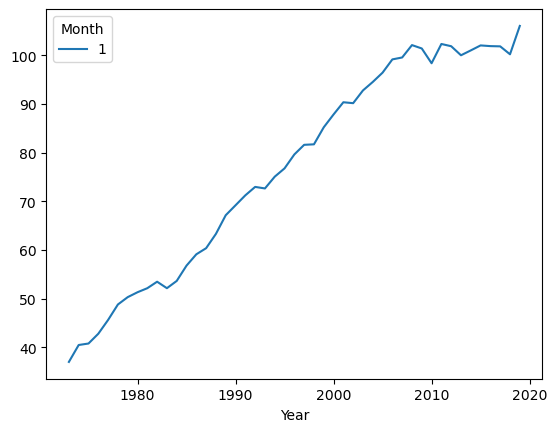

In [15]:
#trends, seasonality, patterns ?
pd.pivot_table(data = Electricity_data ,values=  'Electricty_Consumption_in_TW',index = 'Month', columns = 'Year').T.plot()

<AxesSubplot:xlabel='Month'>

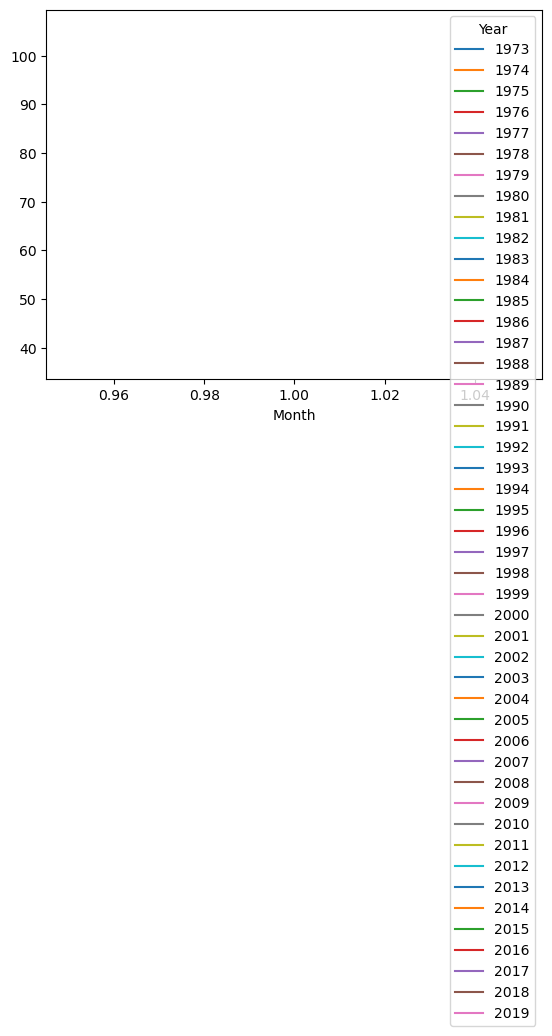

In [16]:
pd.pivot_table(data = Electricity_data ,values=  'Electricty_Consumption_in_TW',index = 'Year', columns = 'Month').T.plot()
# After seen this plot we can say that their seasonality is present .

<AxesSubplot:>

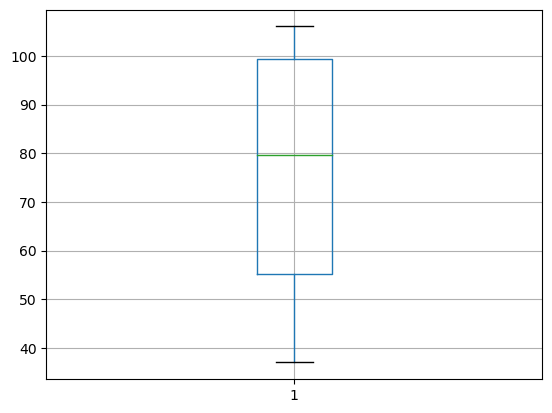

In [17]:
pd.pivot_table(data = Electricity_data ,values=  'Electricty_Consumption_in_TW',index = 'Year', columns = 'Month').boxplot()
# Here I can able to see variance or range in Electricty_Consumption_in_TW in month with respect to all years .

In [18]:
ts = Electricity_data.Electricty_Consumption_in_TW

In [19]:
ts

DATE
1973-01-01     35.9728
1973-01-02     36.1334
1973-01-03     35.0625
1973-01-04     33.8416
1973-01-05     33.5107
                ...   
2019-01-05     97.5860
2019-01-06    110.8580
2019-01-07    122.1014
2019-01-08    121.7765
2019-01-09    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [20]:
ts.rolling(3).mean()
#  A way to calculate Rolling Average .

DATE
1973-01-01           NaN
1973-01-02           NaN
1973-01-03     35.722900
1973-01-04     35.012500
1973-01-05     34.138267
                 ...    
2019-01-05     93.537967
2019-01-06     99.210433
2019-01-07    110.181800
2019-01-08    118.245300
2019-01-09    117.865633
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [28]:
pip install stldecompose

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [33]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from statsmodels.tsa.stattools import adfuller
from stldecompose import decompose, forecast             # Decomposition & forecasting
from statsmodels.tsa.holtwinters import ExponentialSmoothing #ETS Models
from fbprophet import Prophet #you need to install fbprophet using pip install

ImportError: cannot import name '_maybe_get_pandas_wrapper_freq' from 'statsmodels.tsa.filters._utils' (C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\filters\_utils.py)

In [22]:
decompose = seasonal_decompose(ts, two_sided=False, extrapolate_trend=4 ,model='multiplicative')

# two_sided=False means when we are taking Moving Avg.so some value in top is empty .or if we take Centred Moving Avg. then some 
# value at bottom is empty .
# But they will calc. this value bcz SI , Trend is calc. for this value ..
# It's optional u can leave it also ..

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
decompose.plot()[0]

# Original , Trend , Seasonality , Irregularity .

In [ ]:
fig = decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()
# Here we eaily see the trend & seasonality present .

In [24]:
decompose.trend

NameError: name 'decompose' is not defined

In [23]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

NameError: name 'decompose' is not defined

In [26]:
decompose_data
# Here we split the data and look for the contribution of each term on the  Actual value .

,Trend,SI,Irregular,Actual
DATE,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014


In [27]:
decompose_data['Decompose_Value'] = decompose_data.Trend*decompose_data.SI*decompose_data.Irregular

In [28]:
decompose_data

,Trend,SI,Irregular,Actual,Decompose_Value
DATE,,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107,33.5107
...,...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014,122.1014


#### We will be Calculating Accuracy :

In [29]:
print("MAPE_test:", np.mean(np.abs(decompose_data.Decompose_Value- decompose_data.Actual)/decompose_data.Actual ))

print("RMSE_test:", np.sqrt( np.square(np.subtract(decompose_data.Actual,decompose_data.Decompose_Value) ).mean() ))

print("RMSPE_test:", np.sqrt(np.mean(np.square(( (decompose_data.Decompose_Value - decompose_data.Actual)/decompose_data.Actual) ))) )

MAPE_test: 5.528337116327108e-17
RMSE_test: 7.181019137829238e-15
RMSPE_test: 9.403418228458677e-17


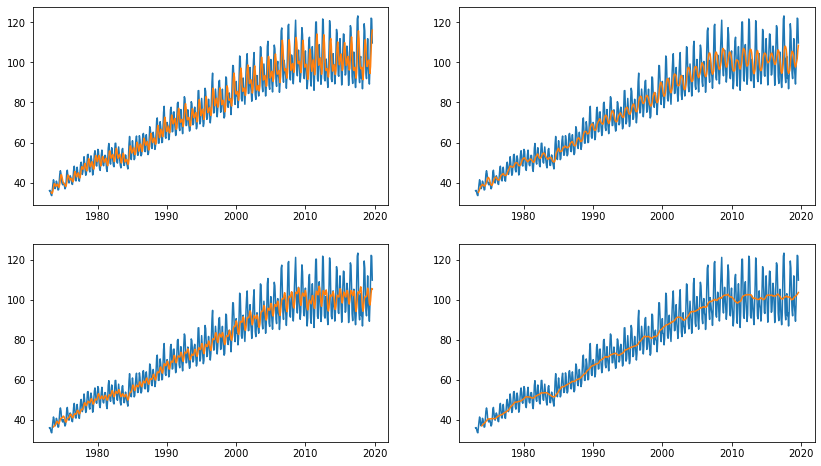

In [30]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='4-Months Rolling Mean')
axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='4-Months Rolling Mean')
axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='4-Months Rolling Mean')

# Here we are taking different moving average .

####  Split the data into Train & Test :

In [31]:
train = ts[:'2018-12-02']
test = ts['2019-01-01':]

In [114]:
test

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

### <a> ETS Models = Econometric Time Series Models

In [ ]:
#### let take alpha , beta & gamma value randomly . A way how to perform ETS model .

In [90]:
alpha = 0.4
beta = 0.5
gamma = 0.1
ets_model = ExponentialSmoothing(train,  trend='mul', seasonal='mul', seasonal_periods=12) # here we built on train data .
ets_model = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-90-b9642d7e77f2>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [92]:
ets_model.forecast(steps=9)

#forward testing
print("MAPE_test:", np.mean(np.abs(ets_model.forecast(steps=9) - test)/test ))

print("RMSE_test:", np.sqrt( np.square(np.subtract(test,ets_model.forecast(steps=9)) ).mean() ))

print("RMSPE_test:", np.sqrt(np.mean(np.square(( (ets_model.forecast(steps=9) - test)/test) ))) )

MAPE_test: 0.030027118485402085
RMSE_test: 3.252282187307818
RMSPE_test: 0.03113332962453582


In [93]:
ets_model.forecast(36) # forecast for next 3 years .

2019-01-01    107.875387
2019-02-01    101.287753
2019-03-01     97.486965
2019-04-01     92.350555
2019-05-01     99.007473
2019-06-01    114.260108
2019-07-01    125.624832
2019-08-01    124.832582
2019-09-01    111.963241
2019-10-01     99.879850
2019-11-01     98.357495
2019-12-01    109.343598
2020-01-01    115.267669
2020-02-01    108.228610
2020-03-01    104.167369
2020-04-01     98.678982
2020-05-01    105.792072
2020-06-01    122.089911
2020-07-01    134.233415
2020-08-01    133.386876
2020-09-01    119.635648
2020-10-01    106.724230
2020-11-01    105.097553
2020-12-01    116.836492
2021-01-01    123.166517
2021-02-01    115.645098
2021-03-01    111.305556
2021-04-01    105.441070
2021-05-01    113.041593
2021-06-01    130.456260
2021-07-01    143.431912
2021-08-01    142.527362
2021-09-01    127.833816
2021-10-01    114.037629
2021-11-01    112.299482
2021-12-01    124.842844
Freq: MS, dtype: float64

#### As here Triple exponential works better because both Trend & Seasonality exists.

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [100]:
np.any(np.isnan(ts)) # checking is there any null value present in ts.

False

In [101]:
np.all(np.isfinite(ts)) # checking that all value present in ts should be finite or not .

True

In [110]:
ts

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [114]:
auto_hwm(ts, val_split_date = '2018-12-02', alpha = [0.1, 0.2, 0.3,0.4, 0.5],
              beta = [0.1, 0.2, 0.3,0.4, 0.5], gamma = [0.1, 0.2, 0.3,0.4, 0.5], 
                 trend='mul', seasonal='mul', periods=12, verbose=True)
# Till 2018-12-01 we used this for model build .

Evaluating Exponential Smoothing model for 125 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is 

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarni

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarni

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothi

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: Futur

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.1}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarni

Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.3}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.4}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.2}


<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)


Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.3}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\a

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}


C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-99-a79327837820>:20: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\ashis\anaconda3\lib\site-pack

{'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2, 'mae': array(0.01382954)}

In [50]:
# our guessed parameters
alpha = 0.1
beta = 0.5
gamma = 0.2

# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-50-22a79d14fef6>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [51]:
fcast = ets_fit.forecast(steps=9)
fcast

2019-01-01    104.353493
2019-02-01     97.359285
2019-03-01     93.349929
2019-04-01     87.566307
2019-05-01     93.306135
2019-06-01    107.665092
2019-07-01    118.734299
2019-08-01    117.770829
2019-09-01    105.537454
Freq: MS, dtype: float64

In [52]:
#forward testing
print("MAPE_test:", np.mean(np.abs(fcast - test)/test ))

print("RMSE_test:", np.sqrt( np.square(np.subtract(test,fcast ) ).mean() ))

print("RMSPE_test:", np.sqrt(np.mean(np.square(( (fcast - test)/test) ))) )

MAPE_test: 0.029113876858864733
RMSE_test: 3.836622979186576
RMSPE_test: 0.03480106163142939


In [53]:
ETS_MAPE = np.mean(np.abs(fcast - test)/test )

ETS_RMSE = np.sqrt( np.square(np.subtract(test,fcast ) ).mean() )

ETS_RMSPE = np.sqrt(np.mean(np.square(( (fcast - test)/test) ))) 

In [104]:
### We are forecast the value using ETS Model :

In [105]:
# our guessed parameters
alpha = 0.1
beta = 0.5
gamma = 0.2

# initialise model
ets_model_n = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit_n = ets_model_n.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-105-7e45e354ba3b>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit_n = ets_model_n.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [106]:
forecast_n = ets_fit_n.forecast(steps=9)
forecast_n
# we forecast using this model for next 24 months .

2019-10-01     97.885534
2019-11-01     96.114157
2019-12-01    106.862572
2020-01-01    113.859646
2020-02-01    104.950195
2020-03-01    101.142454
2020-04-01     95.504681
2020-05-01    102.693661
2020-06-01    118.473478
Freq: MS, dtype: float64

#### Plot which is showing future values :

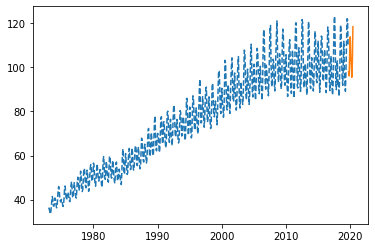

In [107]:
plt.plot(ts, '--', label='obs')
plt.plot(forecast_n, '-', label=forecast)

### <a>SARIMA :

<AxesSubplot:xlabel='DATE'>

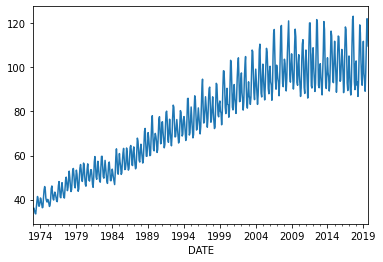

In [54]:
ts.plot()

In [55]:
adfuller(ts) # It's a statsically test .
# test stastics ,
# p value .
#p value < 0.05 then we can say that it's a stationary data , but here p vaue >0.05 so we need to do differencing here .

(-1.7405933729832284,
 0.41032816044687603,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [56]:
ts.diff(1).dropna() 
adfuller(ts.diff(1).dropna())     
# Here we got p value < 0.05 , it's means ts.diff(1) is a stationary series

(-7.941665363981172,
 3.3013438021516752e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [57]:
adfuller(np.log(ts).diff(1).dropna()) 
# we getting better p value with log .

(-6.8848097229178675,
 1.4034181751310378e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

<AxesSubplot:xlabel='DATE'>

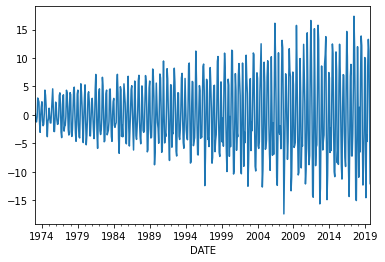

In [58]:
ts.diff(1).dropna().plot() 
# Here mean may be comstant over time but variance isn't .

In [59]:
ln_ts = np.log(ts)
ln_ts_diff1 = ln_ts.diff(1).dropna()  # we need to drop null values then only we can use it to plot .

<AxesSubplot:xlabel='DATE'>

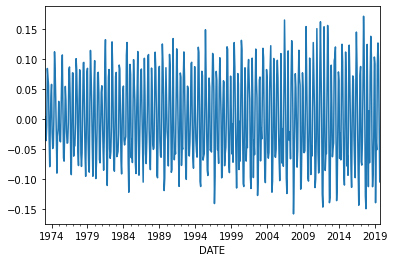

In [60]:
ln_ts_diff1.plot()
# Here mean and variance is constant over time .

In [61]:
from statsmodels.tsa.stattools import acf, pacf_ols

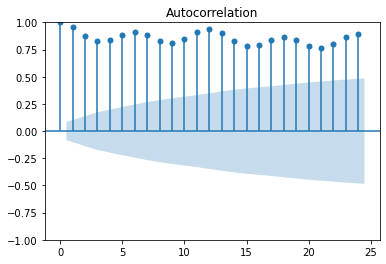

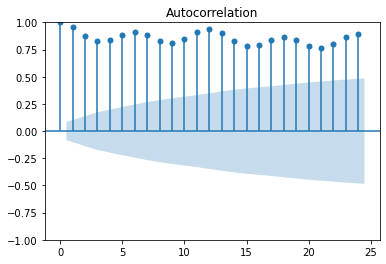

In [62]:
smt.graphics.plot_acf(ts, lags=24) 
# Auto corr fun" - here we are doing it b/w ts & 24 lag i.e lag_24_yt
# Non stationary series bcz none value is crossing zero or becoming zeros .

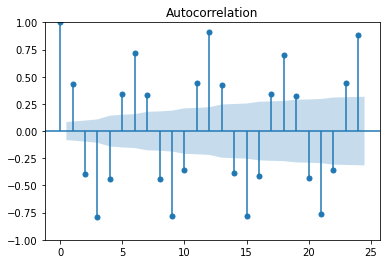

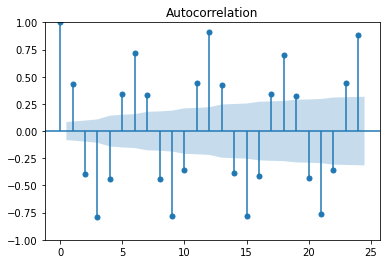

In [63]:
smt.graphics.plot_acf(ln_ts_diff1, lags=24)
# here we see a pattern after every 12 months i.e. we can say it's seasonality ..
# It's a stationary series bcz the value is crossing zeros then we can say this .
# even u have ADF test to check for stationary series . but if u want to see u can see with plot .
# q value will be 1.

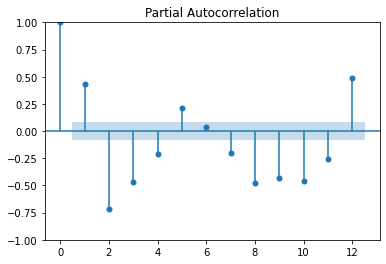

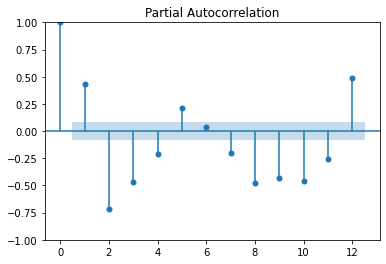

In [64]:
smt.graphics.plot_pacf(ln_ts_diff1, lags=12, method='ols')
#pacf used mainly for P value calculation .
# p value will be 1.

In [65]:
adfuller(ln_ts.diff(1).dropna())

(-6.8848097229178675,
 1.4034181751310378e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [66]:
ln_train = np.log(train)
ln_train

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2018-08-01    4.751094
2018-09-01    4.638673
2018-10-01    4.550177
2018-11-01    4.520787
2018-12-01    4.624858
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [67]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_train, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1319.062
Date:                            Tue, 28 Mar 2023   AIC                          -2628.124
Time:                                    19:19:31   BIC                          -2606.694
Sample:                                01-01-1973   HQIC                         -2619.741
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6204      0.054     11.404      0.000       0.514       0.727
ma.L1         -0.8928      0.034   

In [69]:
fcst = np.exp(model.forecast(9))
fcst

2019-01-01    106.910533
2019-02-01     99.066000
2019-03-01     94.379524
2019-04-01     88.013146
2019-05-01     93.594486
2019-06-01    108.150770
2019-07-01    119.437751
2019-08-01    118.538446
2019-09-01    105.756694
Freq: MS, Name: predicted_mean, dtype: float64

In [70]:
actual = (test)
actual

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [71]:
#forward testing :

print("MAPE_test:", np.mean(np.abs(actual-fcst)/actual))

print("RMSE_test:", np.sqrt( np.square(np.subtract(actual,fcst ) ).mean() ))

print("RMSPE_test:", np.sqrt(np.mean(np.square(( (fcst - actual)/actual) ))) )

# if any model give me less than 5 % error in MAPE it's good 

MAPE_test: 0.02564503167586124
RMSE_test: 3.085010257489176
RMSPE_test: 0.028351214395751386


In [72]:
SARIMA_MAPE = np.mean(np.abs(fcast - test)/test )

SARIMA_RMSE = np.sqrt( np.square(np.subtract(test,fcast ) ).mean() )

SARIMA_RMSPE = np.sqrt(np.mean(np.square(( (fcast - test)/test) ))) 

In [73]:
#backward testing
act = train['2018-12-01':]

pred = np.exp(model.fittedvalues['2018-12-01':])

In [74]:
pred = np.exp(model.fittedvalues)['2018-12-01':]
act = np.exp(ln_ts)['2018-12-01':]

In [75]:
print('train_error_last9month:', np.mean(np.abs(act-pred)/act))

train_error_last9month: 0.004570373852922766


In [108]:
### We are forecast the value using SARIMA Model :

In [100]:
import statsmodels.api as sm

model_n = sm.tsa.statespace.SARIMAX(ln_ts, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
forecast= np.exp(model_n.forecast(steps=24))
forecast 
# we forecast using this model for next 24 months .

2019-10-01     96.391325
2019-11-01     93.769479
2019-12-01    103.839150
2020-01-01    109.987491
2020-02-01    100.752704
2020-03-01     96.225114
2020-04-01     90.030982
2020-05-01     96.327972
2020-06-01    111.116305
2020-07-01    122.771039
2020-08-01    121.948907
2020-09-01    108.897008
2020-10-01     96.112134
2020-11-01     93.800098
2020-12-01    104.173303
2021-01-01    110.532594
2021-02-01    101.264369
2021-03-01     96.726750
2021-04-01     90.481249
2021-05-01     96.877398
2021-06-01    111.884561
2021-07-01    123.722573
2021-08-01    122.892921
2021-09-01    109.647957
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot which is showing future values :

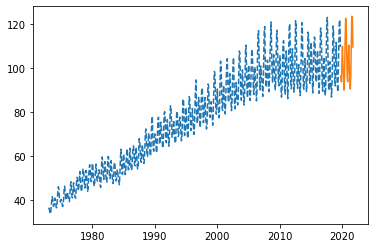

In [103]:
plt.plot(ts, '--', label='obs')
plt.plot(forecast, '-', label=forecast)

#### Other way to get best values of p,d,q according to minimum AIC :

In [78]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [79]:
best_results = auto_arima(ln_ts,  p=range(0, 3), d=range(0,1), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3225.9689567972077
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2460.3880425650095
SARIMAX(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2431.2316000364503
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1885.4463049020064
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1885.808880347872
SARIMAX(0, 0, 0)x(0, 1, 2, 12)12 - AIC:-1856.2629548754278
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-2029.9478344670015
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-2040.716822262778
SARIMAX(0, 0, 0)x(1, 0, 2, 12)12 - AIC:-2027.1104398574441
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1892.5962911544805
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-2039.531597720782
SARIMAX(0, 0, 0)x(1, 1, 2, 12)12 - AIC:-2072.1223062058634
SARIMAX(0, 0, 0)x(2, 0, 0, 12)12 - AIC:-2034.45818707046
SARIMAX(0, 0, 0)x(2, 0, 1, 12)12 - AIC:-2033.3458081385897
SARIMAX(0, 0, 0)x(2, 0, 2, 12)12 - AIC:-2026.0985365159622
SARIMAX(0, 0, 0)x(2, 1, 0, 12)12 - AIC:-1883.818480533435
SARIMAX(0, 0, 0)x(2, 1, 1, 12)12 - AIC:-2050.57485319301
SARIMAX(

In [76]:
import statsmodels.api as sm

model1 = sm.tsa.statespace.SARIMAX(ln_train, order = (2,0,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model1.summary())

# we got best value of p,d,q on the basis of min. AIC .

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:         Electricty_Consumption_in_TW   No. Observations:                  552
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                1320.982
Date:                              Tue, 28 Mar 2023   AIC                          -2627.964
Time:                                      19:19:44   BIC                          -2597.962
Sample:                                  01-01-1973   HQIC                         -2616.227
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3445      0.124     10.842      0.000       1.101       1.588
ar.L2         -0.34

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
ln_train

DATE
1973-01-01    3.582763
1973-02-01    3.587218
1973-03-01    3.557132
1973-04-01    3.521691
1973-05-01    3.511865
                ...   
2018-08-01    4.751094
2018-09-01    4.638673
2018-10-01    4.550177
2018-11-01    4.520787
2018-12-01    4.624858
Name: Electricty_Consumption_in_TW, Length: 552, dtype: float64

In [79]:
fcst = np.exp(model1.forecast(9))
fcst

2019-01-01    106.913365
2019-02-01     99.212674
2019-03-01     94.693489
2019-04-01     88.492451
2019-05-01     94.108022
2019-06-01    108.599806
2019-07-01    119.839951
2019-08-01    119.016952
2019-09-01    106.424791
Freq: MS, Name: predicted_mean, dtype: float64

In [80]:
actual = (test)
actual

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [81]:
#forward testing :

print("MAPE_test:", np.mean(np.abs(actual-fcst)/actual))

print("RMSE_test:", np.sqrt( np.square(np.subtract(actual,fcst ) ).mean() ))

print("RMSPE_test:", np.sqrt(np.mean(np.square(( (fcst - actual)/actual) ))) )

# if any model give me less than 5 % error in MAPE it's good 


MAPE_test: 0.02307034639935089
RMSE_test: 2.7875986315595256
RMSPE_test: 0.025629202156788784


In [82]:
SARIMA_MAPE_OPTIMUM = np.mean(np.abs(fcast - test)/test )

SARIMA_RMSE_OPTIMUM = np.sqrt( np.square(np.subtract(test,fcast ) ).mean() )

SARIMA_RMSPE_OPTIMUM = np.sqrt(np.mean(np.square(( (fcast - test)/test) ))) 

In [83]:
#backward testing
act = train['2018-12-01':]

In [84]:
pred = np.exp(model1.fittedvalues['2018-12-01':])

In [85]:
pred = np.exp(model1.fittedvalues)['2018-12-01':]
act = np.exp(ln_ts)['2018-12-01':]

In [86]:
print('train_error_last9month:', np.mean(np.abs(act-pred)/act))

train_error_last9month: 0.0076120098291126235


In [109]:
### We are forecast the value using SARIMA_OPTIMUM Model :

In [97]:
model2 = sm.tsa.statespace.SARIMAX(ln_ts, order = (2,0,2), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ashis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
fcast= np.exp(model2.forecast(steps=24))
fcast 
# we forecast using this model for next 24 months .

2019-10-01     96.838896
2019-11-01     94.276907
2019-12-01    104.335281
2020-01-01    110.594931
2020-02-01    101.516860
2020-03-01     97.184285
2020-04-01     91.134164
2020-05-01     97.483791
2020-06-01    112.202503
2020-07-01    123.802923
2020-08-01    123.018573
2020-09-01    110.179197
2020-10-01     97.615126
2020-11-01     95.352330
2020-12-01    105.706947
2021-01-01    112.132964
2021-02-01    102.918468
2021-03-01     98.520504
2021-04-01     92.370676
2021-05-01     98.836177
2021-06-01    113.823998
2021-07-01    125.643361
2021-08-01    124.848836
2021-09-01    111.775871
Freq: MS, Name: predicted_mean, dtype: float64

#### Plot which is showing future values :

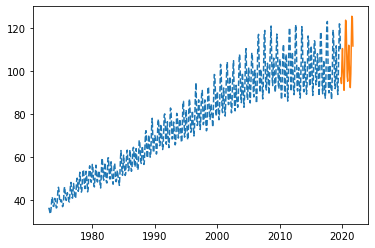

In [99]:
plt.plot(ts, '--', label='obs')
plt.plot(fcast, '-', label=fcast)

#### <a>Comparing metrics of each model

In [87]:
#Getting accuracy and log loss for each model
metric_data = pd.DataFrame({'Model' : ['ETS', 'SARIMA', 'SARIMA_OPTIMUM'], 
                        'MAPE' : [ETS_MAPE, SARIMA_MAPE ,SARIMA_MAPE_OPTIMUM ],
                        'RMSE' : [ETS_RMSE, SARIMA_RMSE , SARIMA_RMSE_OPTIMUM],    
                        'RMSPE' : [ETS_RMSPE,SARIMA_RMSPE,SARIMA_RMSPE_OPTIMUM]
                           })

In [88]:
metric_data

,Model,MAPE,RMSE,RMSPE
0,ETS,0.029114,3.836623,0.034801
1,SARIMA,0.029114,3.836623,0.034801
2,SARIMA_OPTIMUM,0.023070,2.787599,0.025629


In [92]:
metric_data[['MAPE','RMSE','RMSPE']] = metric_data[['MAPE','RMSE','RMSPE']].applymap(lambda x : round((x*100),3))


In [93]:
metric_data

,Model,MAPE,RMSE,RMSPE
0,ETS,291.1,38366.2,3.480
1,SARIMA,291.1,38366.2,3.480
2,SARIMA_OPTIMUM,230.7,27876.0,2.563


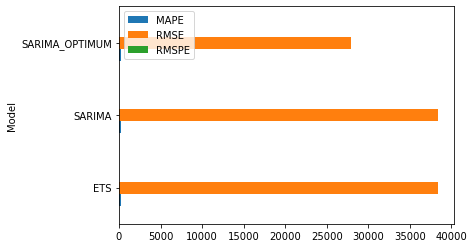

In [94]:
#Visualizing each model's accuracy and log loss metric
metric_data.plot(x = 'Model', y = ['MAPE','RMSE','RMSPE'], kind = 'barh')
plt.legend(loc = 2)
plt.show()


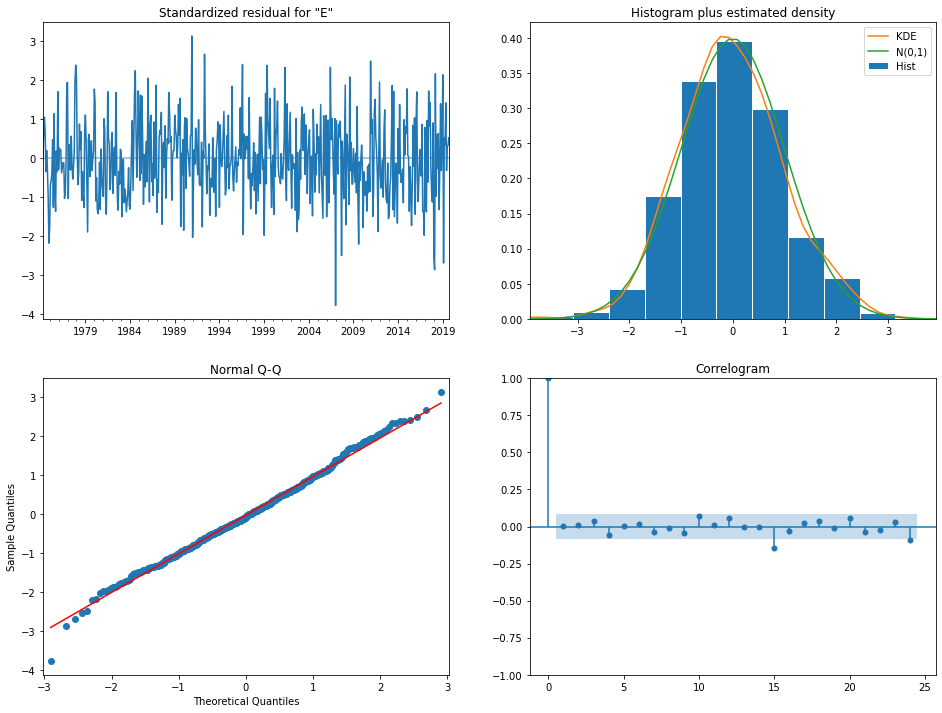

In [106]:
model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

# Some criteria we need to check whether it's need to follow or not ?
#checks:
#1. Errors should follow normal distribution (plot2, plot3)
#2. Errors should not have any autocorrelation (plot 4) # It can be white noised or random walk .

# if so many values are deviating in plot 3 then we can say it's not follow normal distribution .